In [56]:
pip install yfinance

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU

In [58]:
#Cargar los datos
company = 'AMZN'
ticker = yf.Ticker(company)
hist = ticker.history(start = '2012-1-1', end='2020-1-1')

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03 00:00:00-05:00,8.794500,8.974000,8.777500,8.951500,102216000,0.0,0.0
2012-01-04 00:00:00-05:00,8.960500,9.025000,8.803500,8.875500,84104000,0.0,0.0
2012-01-05 00:00:00-05:00,8.797000,8.912500,8.702500,8.880500,76182000,0.0,0.0
2012-01-06 00:00:00-05:00,8.903500,9.232500,8.875000,9.130500,140168000,0.0,0.0
2012-01-09 00:00:00-05:00,9.138000,9.218500,8.850000,8.928000,101138000,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,89.690498,89.778503,89.378998,89.460503,17626000,0.0,0.0
2019-12-26 00:00:00-05:00,90.050499,93.523003,89.974998,93.438499,120108000,0.0,0.0
2019-12-27 00:00:00-05:00,94.146004,95.070000,93.300499,93.489998,123732000,0.0,0.0


In [59]:
#Preparar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(hist['Close'].values.reshape(-1,1))

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(1952, 60, 1)

In [60]:
#Contruir el modelo
model = Sequential()

model.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train,epochs=25,batch_size=32)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - loss: 0.0366
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.0018
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0016
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0014
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 0.0014
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0013
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0015
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0012
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0012
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0010    
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - loss: 0.0013
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0013
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0011
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0012
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 9.5494e-04


In [61]:
#Cargar los datos del test
hist_test = ticker.history(start = '2018-1-1', end='2022-1-21')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((hist['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))


In [62]:
x_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


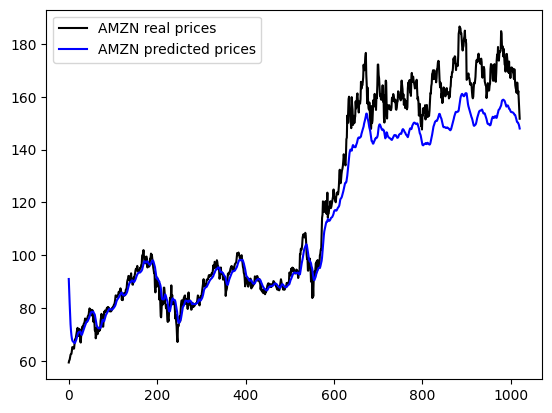

In [63]:
plt.plot(actual_prices,color="black",label=f"{company} real prices")
plt.plot(predicted_prices,color="blue",label=f"{company} predicted prices")
plt.legend()
plt.show()

In [64]:
rentability = 1
for i in range(1,len(actual_prices)):
  if predicted_prices[i] > actual_prices[i-1]:
    rentability*= actual_prices[i]/actual_prices[i-1]

print((rentability-1)*100,"%")

29.49768709909657 %
